# Statistical Foundations in Machine Learning Project - Regression And Classification

# Introduction

This project aims to compare the performance of two popular machine learning algorithms (k-Nearest-Neighbour and Artifical Neural networks) for supervised learning. A systemmatic strategy is used to predict the optimal parameters (such as best value of k in KNN, number of hidden layers in ANN, regularization parameters for the data being trained) for both classification and regression. Once the optimal parameters are obtained, the in-sample and out-of-sample errors are estimated for both the techniques, along with plots to compare the predictions with the actual data. The final kFold cross validation scores associated with the techniques for all the data is also estimated. 

The data used for the project, the corresponding tasks performed and the conclusions are quickly summarized below: 

#### Regression
**Synthetic data :** A generated noisy function comprising of sinusoidal and different polynomial functions  : I note that the KNN works best for such noisy data when the noise amplitudes are large and sample size is relatively small. On the contrary, ANN fails to predict large variations in data if the dataset is small (~ 1000), even when the number of hidden layers is large.

**Real-world data :** Air pollution in Seoul, where the correlation between the concentration of pollutants (e.g SO2, NO2, CO, O3, PM10 and PM2.5) is first estimated, and some pollutations are used to predict the concentration of other correlated pollutants. Both KNN and ANN perform the prediction well for this task with comparable (~ 75%) accuracies. Furthermore, I combine the two independent methods to yield a third method for prediction.   

#### Classification
**Synthetic data :** A generated dataset with a large number of input features to test the accuracy of the two methods.With the optimal parameters, the two methods work with accuracy of ~ 90%.  

**Real-world data :** A highly skewed credit card fraudulant data. Appropriate sampling is performed to have a unifromly distributed data and the two algorithms (ANN and KNN) are used for prediction. The two methods work well with a score of over 90%, with ANN slightly outperforming that of KNN.   


More information about the data and results will be presented as we navigate through the notebook. 


# Required Libraries
The algorithms are taken from the SciKit Learn (sklearn) python module information about the data and results will be presented as we navigate through the notebook. For interpretation of text data, performing statistcics, and plotting data, the modules pandas, scipy, numpy, seaborn, and matplotlib are used. Some of the data also involves date and time, and hence datetime is also used.

In [1]:
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, train_test_split
from sklearn import metrics
from sklearn import linear_model, datasets
import sklearn

from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn; seaborn.set()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import datetime
from dateutil.relativedelta import relativedelta


import warnings
warnings.filterwarnings('ignore')


# 1 : Regression

This section describes all the algorithms and data associated with Regression. Appropriate subsections (1.1) and (1.2) are provided for synthetic and real-world data respectively. 

### 1.1 Regression with Synthetic Dataset
The synthetic dataset is generated and plotted. Note that the synthetic data

$y = f(x) + noise$, 

where $f(x) = 100\mathrm{sin}(0.2x) + 2.5x + 0.01x^{1.1} -100x^{0.5}$
Each of the term in f(x) is associated with noise having mean = 0 and large standard deviations. 

This data is generated to get an idea about how the methods KNN and ANN compare for data with large values of noise, and whether they are accurate enough.  


Text(0.5, 1.0, 'Generated data y as a function of x')

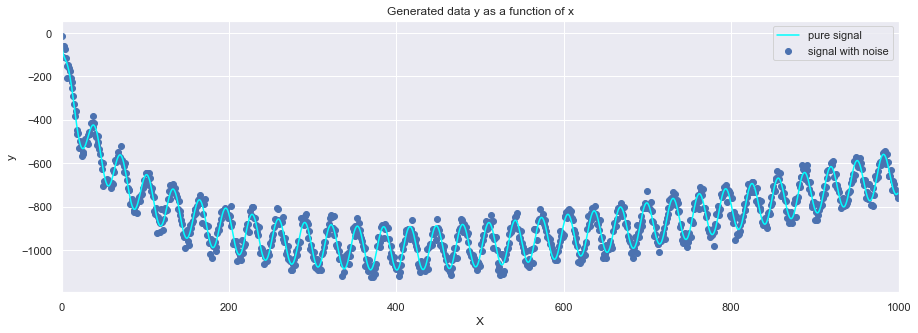

In [2]:
num_samples = 1000;
X = np.array(range(num_samples)); X = X.reshape(num_samples,1)

a1 = 100; n1 = np.random.normal(0,25,num_samples); n1 = n1.reshape(num_samples,1)
a2 = 2.5; n2 = np.random.normal(0,0.25,num_samples); n2 = n2.reshape(num_samples,1)
a3 = 0.01; n3 = np.random.normal(0,0.5,num_samples); n3 = n3.reshape(num_samples,1)
a4 = -100; n4 = np.random.normal(0,10,num_samples); n4 = n4.reshape(num_samples,1) 

pure_signal = a1*np.sin(0.2*X) + a2*X + a3*np.power(X,1.1) + a4*np.power(X,0.5);
noise = n1 + n2 + n3 + n4;
y = pure_signal + noise

plt.figure(figsize=(15,5))
plt.plot(X, pure_signal, color='cyan', label = 'pure signal')
plt.scatter(X, y, label = 'signal with noise')
plt.xlim(0,1000)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Generated data y as a function of x')


### 1.1.1 Prediction with KNN on Synthetic Dataset 

We now train the k-nearest neighbours (KNN) algorithm on the synthetic data set for different values of k. The predicted values from KNN with that of the pure signal, for different values of k, is first plotted. Note that the data is first split into training and testing datasets, and the input features are scaled prior to prediction.

The scores obtained for the training and testing dataset, along with the cross validation score is estimated and plotted. The value of k (=3) which gives the best cross validation score is then selected. Note that k cannot be be too small (leading to overfitting) not too large (leading to large bias).

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 
X_scaled = scaler.transform(X) 

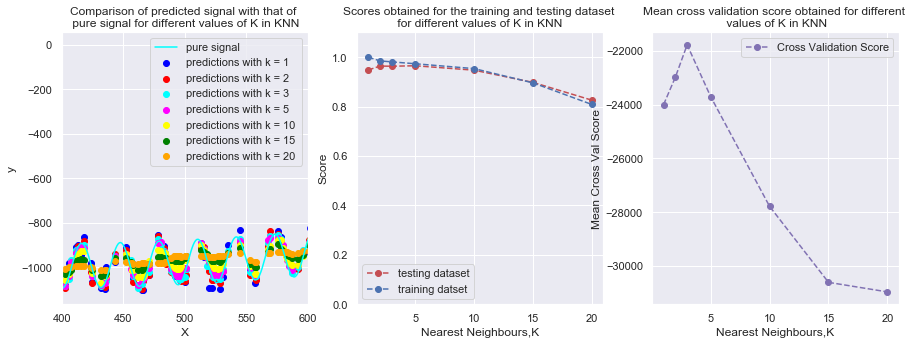

For the synthetic dataset, the best value of K in KNN is 3


In [4]:

Ks = [1,2,3,5,10,15,20]

train_score = np.zeros(len(Ks))
test_score = np.zeros(len(Ks))
cross_val_scores = np.zeros(len(Ks))

colors = ('blue', 'red', 'cyan', 'magenta', 'yellow', 'green', 'orange')

plt.figure(figsize=(15,5))

# Estimate score for different values of k

plt.subplot(131)
for k in np.arange(0,len(Ks)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=Ks[k])
    y_predicted = knn.fit(X_train_scaled,y_train).predict(X_test_scaled)
    label_string = 'predictions with k = {} '.format(str(Ks[k]))
    plt.scatter(X_test, y_predicted, color=colors[k],label=label_string)
    
    test_score[k] = knn.score(X_test_scaled,y_test)
    train_score[k] = knn.score(X_train_scaled,y_train)
    cross_val_scores[k]=np.mean(cross_val_score(knn,X_scaled, y,cv=5,scoring='neg_mean_squared_error'))

plt.plot(X, pure_signal, color='cyan', label = 'pure signal')
plt.xlim(400,600)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of predicted signal with that of \n pure signal for different values of K in KNN')

plt.subplot(132)
plt.plot(Ks, test_score, 'ro--', label = 'testing dataset' )
plt.plot(Ks, train_score, 'bo--', label = 'training datset' )
plt.xlabel('Nearest Neighbours,K')
plt.ylabel('Score')
plt.ylim(0,1.1)
plt.legend()   
plt.title('Scores obtained for the training and testing dataset \n for different values of K in KNN ')

plt.subplot(133)
plt.plot(Ks,cross_val_scores, 'mo--',label ='Cross Validation Score')
plt.xlabel('Nearest Neighbours,K')
plt.ylabel('Mean Cross Val Score')
plt.legend()
plt.title('Mean cross validation score obtained for different \n values of K in KNN')
plt.show()

bestK =Ks[np.argmax(cross_val_scores)]
print('For the synthetic dataset, the best value of K in KNN is {}'.format(bestK))

***For the best value of K, predicted as well as  the test data are plotted. Furthermore, the learning curves are plotted to understand the accuracies of prediction as well as the number of training examples needed for prediction. Typical accuracies of prediction is over 90% when a large number of samples (~200) are used for training.***

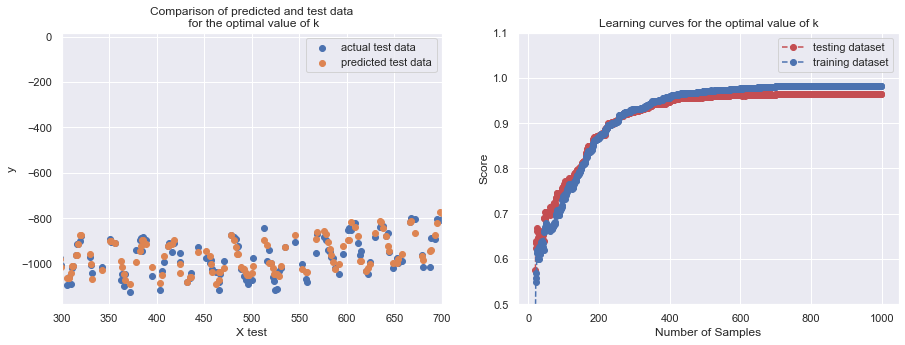

In [5]:

# Compare predicted and test data
knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
p_test = knn.fit(X_train_scaled,y_train).predict(X_test_scaled)
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(X_test, y_test, label='actual test data')
plt.scatter(X_test, p_test, label='predicted test data')
plt.legend()
plt.xlim(300,700)
plt.xlabel('X test')
plt.ylabel('y')
plt.title('Comparison of predicted and test data\n for the optimal value of k')


# Get training and testing curves
interval_learning_curve = 1
learning_samples = np.arange(20, num_samples, interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))

for idx,samples in enumerate(learning_samples):
    knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
    knn.fit(X_train_scaled[0:samples,:],y_train[0:samples])
    train_score[idx] = knn.score(X_train_scaled,y_train)
    test_score[idx] = knn.score(X_test_scaled,y_test)

#plot learning curves
plt.subplot(122)
plt.ylim((0.5,1.1))
plt.plot(learning_samples,test_score,'ro--',label='testing dataset')
plt.plot(learning_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves for the optimal value of k')
plt.show()


### 1.1.2 Prediction with ANN on Synthetic Dataset

We now train the Artificial Neural Network (ANN) algorithm on the synthetic data set. We need to first estimate the optimal parameters for the ANN, i.e. the number of hidden units and the regularization parameter lambda. Note that the data has already been split into testing and training datasets, and scaled before.

Typical scores for the testing/training dataset ~ 80 % seem to be obtained. However, I note that the results are strongly dependent on the number of hidden units and regularization parameter. This is possibly due to the limited dataset available (~ 1000 points overall) with strong fluctuations .

For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is 25
For the synthetic dataset, the best value of lambda in ANN is 0.001


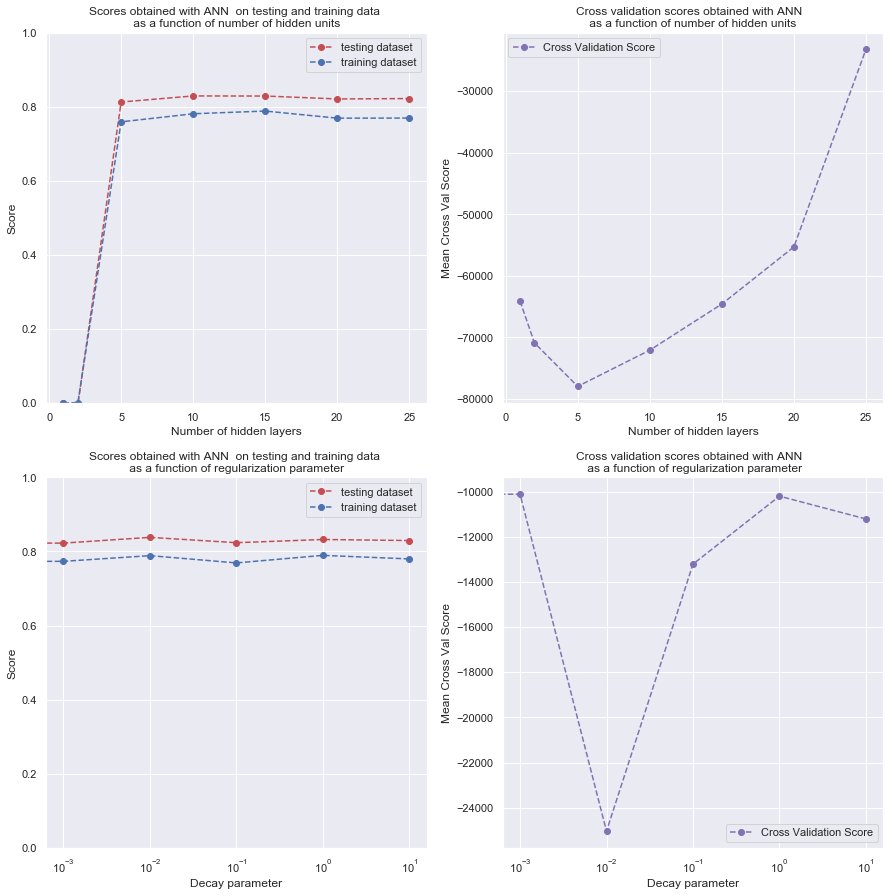

In [6]:
# Try to estimate the number of hidden units required. 
# Sweep the number of hidden units and estimate the scores (testing, training, cross validation)

numhidden = [1, 2, 5, 10, 15, 20, 25]

score_test = np.zeros(len(numhidden))
score_train = np.zeros(len(numhidden))
cross_val_scores = np.zeros(len(numhidden))

for h in np.arange(0,len(numhidden)):
    ann = MLPRegressor(hidden_layer_sizes=(numhidden[h],), activation='relu', solver='lbfgs', max_iter=20000)
    ann.fit(X_train_scaled,y_train)
    score_test[h] = ann.score(X_test_scaled,y_test)
    score_train[h] = ann.score(X_train_scaled,y_train)
    cross_val_scores[h] = np.mean(cross_val_score(ann, X_scaled, y,cv=5,scoring='neg_mean_squared_error'))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(numhidden,score_test,'ro--',label='testing dataset') 
plt.plot(numhidden,score_train,'bo--',label='training dataset')
plt.xlabel('Number of hidden layers')
plt.ylabel('Score')
plt.ylim(0,1)
plt.title('Scores obtained with ANN  on testing and training data \n as a function of number of hidden units ')
plt.legend()

plt.subplot(222)
plt.plot(numhidden,cross_val_scores, 'mo--',label ='Cross Validation Score') 
plt.legend()
plt.xlabel('Number of hidden layers')
plt.ylabel('Mean Cross Val Score') 
plt.title('Cross validation scores obtained with ANN  \n as a function of number of hidden units ')
besth = numhidden[np.argmax(cross_val_scores)]


# For the best value of h, Try to estimate the number of regularization parameter lambda (alpha) required. 
# Sweep the value of alpha  and estimate the scores (testing, training, cross validation)

decays=[0,0.001 ,0.01, 0.1, 1, 10]
score_test = np.zeros(len(decays))
score_train = np.zeros(len(decays))
cross_val_scores = np.zeros(len(decays))

for l in np.arange(0,len(decays)):
    ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = decays[l], solver='lbfgs', max_iter=20000)   
    ann.fit(X_train_scaled,y_train)
    score_test[l] = ann.score(X_test_scaled,y_test)
    score_train[l] = ann.score(X_train_scaled,y_train)
    cross_val_scores[l] = np.mean(cross_val_score(ann, X_scaled, y,cv=20,scoring='neg_mean_squared_error'))

bestl = decays[np.argmax(cross_val_scores)]

#plot performance
plt.subplot(223)
plt.plot(decays,score_test,'ro--',label='testing dataset') 
plt.plot(decays,score_train,'bo--', label='training dataset')
plt.xlabel('Decay parameter')
plt.ylabel('Score')
plt.title('Scores obtained with ANN  on testing and training data \n as a function of regularization parameter ')
plt.legend()
plt.ylim(0,1)
plt.xscale('log')

plt.subplot(224)
plt.plot(decays,cross_val_scores, 'mo--',label ='Cross Validation Score') 
plt.legend()
plt.xlabel('Decay parameter')
plt.ylabel('Mean Cross Val Score')
plt.title('Cross validation scores obtained with ANN  \n as a function of regularization parameter')
plt.xscale('log')

print('For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is {}'.format(besth))
print('For the synthetic dataset, the best value of lambda in ANN is {}'.format(bestl))

***Once the best value of the number of hidden units  and that of lambda are obtained, I will now plot the predicted and test data, along with the learning curves. I note from the plots that for this data, the predictions do not match perfectly the test data. The overall trend of the predicted values is similar to that of testing data, though the high frequency components are not captured. This is due to the limited amount of data (~ 1000 sample)  available with very large fluctuations. Training with ANN requires more samples to capture the fluctuations, and in these scenarios KNN performs better ***

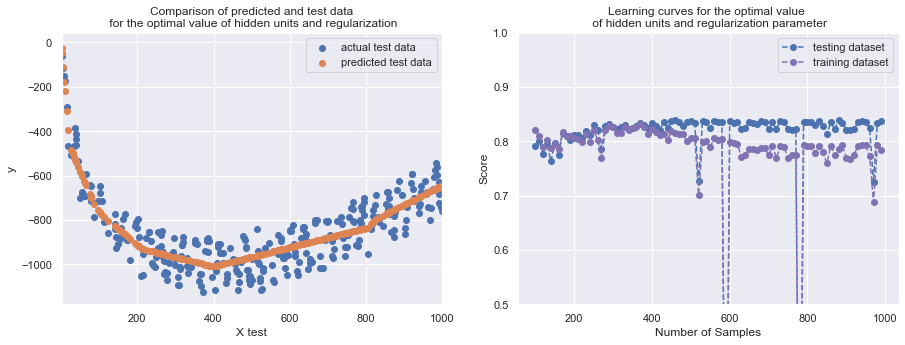

In [8]:
## Plot the comparison between the predicted and testing data

ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = bestl, solver='lbfgs', max_iter=20000)
ann.fit(X_train_scaled,y_train)
p_test= ann.predict(X_test_scaled)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X_test, y_test, label='actual test data')
plt.scatter(X_test, p_test, label='predicted test data')
plt.title('Comparison of predicted and test data\n for the optimal value of hidden units and regularization')
plt.legend()
plt.xlabel('X test')
plt.ylabel('y')
plt.xlim(1,1000)


## Get the learning curve to see the number of samples required for training

interval_learning_curve = 10
learning_samples = np.arange(100,len(y_train) + len(y_test), interval_learning_curve)
#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))


for idx,samples in enumerate(learning_samples):
    ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = bestl, solver='lbfgs', max_iter=20000)
    ann.fit(X_train_scaled[0:samples,:],y_train[0:samples])
    train_score[idx] = ann.score(X_train_scaled[0:samples,:],y_train[0:samples])
    test_score[idx] = ann.score(X_test_scaled,y_test)
    
#plot learning curves

plt.subplot(122)
plt.plot(learning_samples,test_score,'bo--',label='testing dataset')
plt.plot(learning_samples,train_score, 'mo--', label='training dataset')
plt.legend()
plt.ylim((0.5, 1))
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves for the optimal value \n of hidden units and regularization parameter')
plt.show()


### 1.2 RealWord Dataset

From the synthetic datset, we have now understood that KNN performs better than ANN when the dataset is small. We will now move on to a read world dataset which is larger (~25000 points). This dataset corresponds to the air pollution in Seoul from https://www.kaggle.com/bappekim/air-pollution-in-seoul.

Here, the concentration of pollutants (in pppm) SO2, NO2, CO, O3, PM10 and PM2.5 is extracted over 3 years at different locations in Seoul at various times of the day. As the different sources of pollutants can come from similar sources (e.g. combustion of some chemical), there could be a correlation between them which can be understood from the correlation matrix below.  


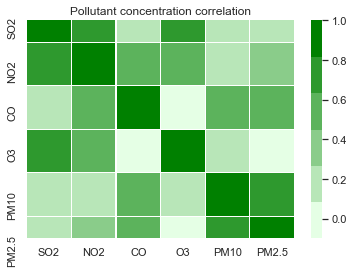

In [9]:
df = pd.read_csv("Measurement_summary.csv")
df['Measurement date']  = [datetime.datetime.strptime(x, "%Y-%m-%d %H:%M") for x in df['Measurement date'].values ]

sort_by_time = df.groupby('Measurement date').mean()
meas_item_info = pd.read_csv("Measurement_item_info.csv")
items = list(meas_item_info['Item name'].values)
corelation_matrix = np.corrcoef(sort_by_time[items], rowvar=False)
sns.heatmap(corelation_matrix, cmap = sns.light_palette("green"), yticklabels=items, xticklabels=items, linewidths=0.1)
plt.title("Pollutant concentration correlation")
plt.show()

**I note that PM10 and PM2.5 concentrations are heaviliy correlated, and want to investigate whether it is possible to predict the PM10 concetrations from PM2.5 concentrations alone using machine learning. For simplicity I am only considering one location in the dataset. I note that there are many outliers and remove them. To provide an idea, I print the initial parts of the data below. Note that the data has ~ 25000 elements.** 



In [10]:
required_station = 101

col_list = ["Measurement date", "Station code", "SO2", "NO2", "O3", "CO","PM10","PM2.5"]

df = pd.read_csv("Measurement_summary.csv", usecols = col_list)

df = df[df['Station code'] == required_station]
datetime = pd.to_datetime(df["Measurement date"], format='%Y-%m-%d %H:%M', errors='ignore')
df['Datetime'] = datetime
df.set_index('Datetime', inplace=True)
to_drop = ['Measurement date', 'Station code']
df.drop(columns=to_drop, inplace=True)

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]# outliers removed from the dataset
df.head()

,SO2,NO2,O3,CO,PM10,PM2.5
Datetime,,,,,,
2017-01-01 00:00:00,0.004,0.059,0.002,1.2,73.0,57.0
2017-01-01 01:00:00,0.004,0.058,0.002,1.2,71.0,59.0
2017-01-01 02:00:00,0.004,0.056,0.002,1.2,70.0,59.0
2017-01-01 03:00:00,0.004,0.056,0.002,1.2,70.0,58.0
2017-01-01 04:00:00,0.003,0.051,0.002,1.2,69.0,61.0


***The data over the first 2 years is considered as the training data, and the remaining 1 year is the testing data. We will now estimate the statistics of the training data and plot the PM10 (the output parameter y)***


	Column               | Type     | Min          | Max          | std         

	SO2                  | float64  |  0.000000000 |  0.027000000 |  0.001704449
	NO2                  | float64  |  0.000000000 |  0.109000000 |  0.016638112
	O3                   | float64  |  0.000000000 |  0.139000000 |  0.019610749
	CO                   | float64  |  0.000000000 |  2.000000000 |  0.242718551
	PM10                 | float64  | -1.000000000 | 120.000000000 | 20.860975801
	PM2.5                | float64  | -1.000000000 | 82.000000000 | 14.842744338

	


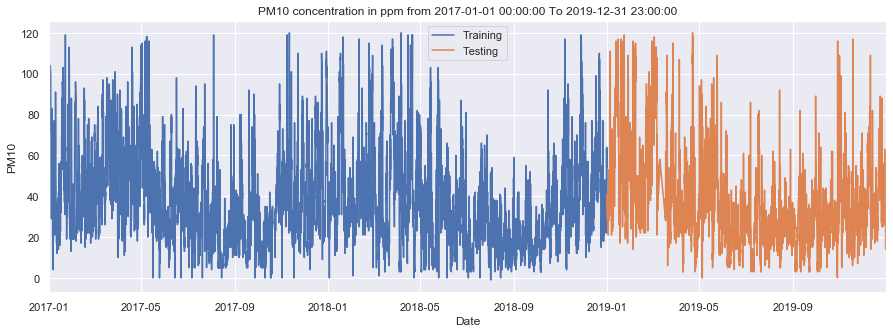

In [11]:
all_df = df
eval_from = df.index.max() + relativedelta(months=-12)  # Here we set the 12 months threshold
train_df = df[df.index < eval_from]
test_df = df[df.index >= eval_from]

print(f"\n\t{'Column':20s} | {'Type':8s} | {'Min':12s} | {'Max':12s} | {'std':12s}\n")
for col_name in train_df.columns:
    col = train_df[col_name]
    print(f"\t{col_name:20s} | {str(col.dtype):8s} | {col.min():12.9f} | {col.max():12.9f} | {col.std():12.9f}")


print(f"\n\t")

def plot_interval(base_data, test, date_from, date_to, column='PM10', title=None):
    plt.figure(figsize=(15,5))
    if title == None:
        plt.title('PM10 concentration in ppm from {0} To {1}'.format(date_from, date_to))
    else:
        plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.plot(base_data.index, getattr(base_data, column), label='Training')
    plt.plot(test.index, getattr(test, column), label='Testing')
    plt.legend()
    plt.xlim(left=date_from, right=date_to)


plot_interval(train_df, test_df, train_df.index[0], test_df.index[-1], column = 'PM10')


#### We now consider only the feature PM2.5 to predict the concentration of PM10 using machine learning. The data is split into training and testing dataset. Though there is only one feature PM2.5 (indicating that the scaling is not necessary), I  still perform the scaling to esure that that the scaled data goes into the algorithms.   


In [12]:
# X = all_df.loc[:, all_df.columns != 'PM10'].values
X = all_df.loc[:, all_df.columns == 'PM2.5'].values
Y = all_df.loc[:, all_df.columns == 'PM10'].values  


#X_train = train_df.loc[:, train_df.columns != 'PM10'].values
X_train = train_df.loc[:, train_df.columns == 'PM2.5'].values
Y_train = train_df.loc[:, train_df.columns == 'PM10'].values  

# X_test = test_df.loc[:, test_df.columns != 'PM10'].values    
X_test = test_df.loc[:, test_df.columns == 'PM2.5'].values    
Y_test = test_df.loc[:, test_df.columns == 'PM10'].values


scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 
X_scaled = scaler.transform(X) 



### 1.2.1 Prediction with KNN on Realword dataset
I now want to predict PM10 from PM2.5 concentration in the real world dataset using KNN. As performed with the synthetic dataset, I need to estimate the optimal value of k from the cross validation/training/testing dataset scores. Like before, the best value of k (== 350) is obtained, the actual test data and the predicted test data are then compared in a plot, and finally the learning curves are plotted. The predictions do match the test data reasonably well. I note that the typical scores obtained for the training/testing datasets here is ~ 75%, and is much smaller than that obtained in the synthetic data (~ 90%). 

For the realworld dataset, the best value of K in KNN is 350


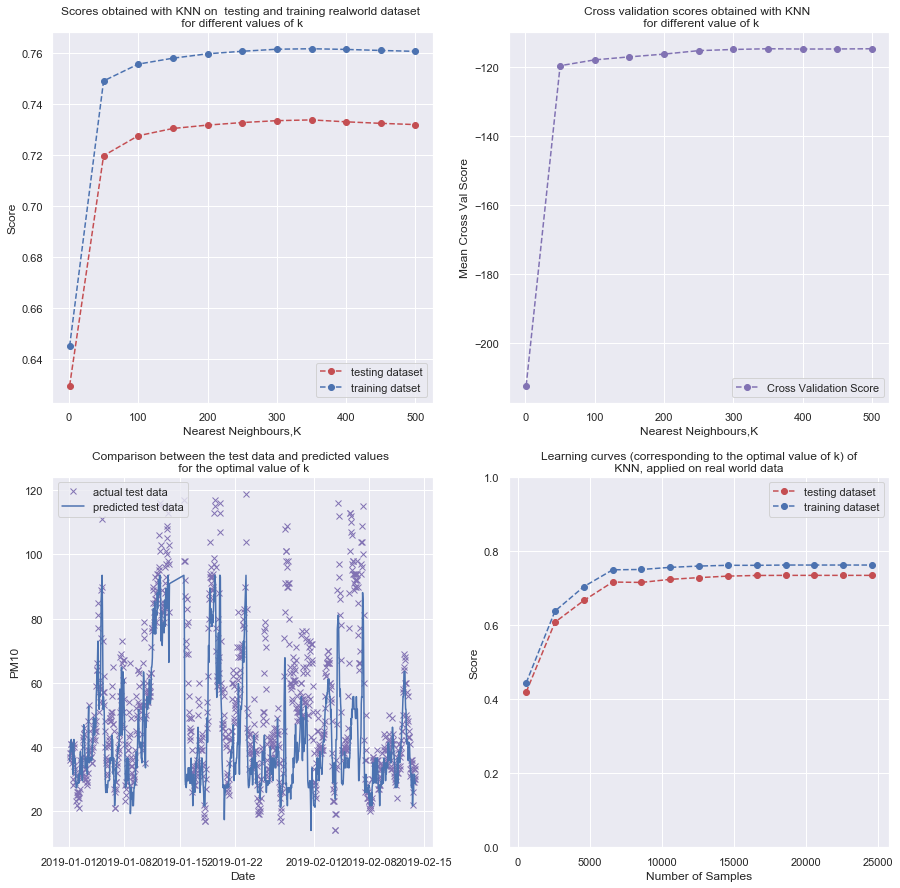

In [14]:
kf = 5

## Run KNN for different values of k and estimate the optimal k.

Ks=[1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

score_test = np.zeros(len(Ks))
score_train = np.zeros(len(Ks))
cross_val_scores = np.zeros(len(Ks))

for k in np.arange(0,len(Ks)):
    knn = neighbors.KNeighborsRegressor(n_neighbors=Ks[k])
    knn.fit(X_train_scaled,Y_train)
    score_test[k] = knn.score(X_test_scaled,Y_test)
    score_train[k] = knn.score(X_train_scaled,Y_train)
    cross_val_scores[k]=np.mean(cross_val_score(knn,X_scaled, Y,cv=kf,scoring='neg_mean_squared_error'))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(Ks, score_test, 'ro--', label = 'testing dataset' )
plt.plot(Ks, score_train, 'bo--', label = 'training datset' )
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Score")
plt.title('Scores obtained with KNN on  testing and training realworld dataset \n for different values of k ')
plt.legend()

plt.subplot(222)
plt.plot(Ks,cross_val_scores, 'mo--',label ='Cross Validation Score')
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Mean Cross Val Score")
plt.legend()
plt.title('Cross validation scores obtained with KNN \n for different value of k')

## estimate best value of k
bestK = Ks[np.argmax(cross_val_scores)]
print('For the realworld dataset, the best value of K in KNN is {}'.format(bestK))


## compared predicted data with test data and plot
knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
p_test = knn.fit(X_train_scaled,Y_train).predict(X_test_scaled)

n1 = 1
n2 = 1000

plt.subplot(223)
plt.plot(test_df.index[n1:n2], Y_test[n1:n2], 'mx', label='actual test data')
plt.plot(test_df.index[n1:n2], p_test[n1:n2], 'b',label='predicted test data')
plt.legend()
plt.xlabel("Date")
plt.ylabel("PM10")
plt.title('Comparison between the test data and predicted values \n for the optimal value of k')


## Estimate the learning curves 

interval_learning_curve = 2000
num_samples = np.arange(600,len(Y_train) + len(Y_test), interval_learning_curve)
train_score = np.zeros(len(num_samples))
test_score = np.zeros(len(num_samples))

for idx,samples in enumerate(num_samples):
    knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
    knn.fit(X_train_scaled[0:samples,:],Y_train[0:samples])
    train_score[idx] = knn.score(X_train_scaled,Y_train)
    test_score[idx] = knn.score(X_test_scaled,Y_test)
    
#plot learning curves
plt.subplot(224)

plt.plot(num_samples, test_score,'ro--',label='testing dataset')
plt.plot(num_samples, train_score, 'bo--', label='training dataset')
plt.legend()
plt.ylim((0,1))
plt.xlabel("Number of Samples")
plt.ylabel("Score")
plt.title('Learning curves (corresponding to the optimal value of k) of\n KNN, applied on real world data ')
plt.show()



### 1.2.2 Prediction with ANN on Realword dataset

We will now perform prediction using ANN using the realworld dataset. As before, we need to estimate the optimal value of the number of hidden units (~ 10) an regularization prameter (~ 100) first from the scores. Typical scores ~ 75 % are obtained for the training and testing datasets.

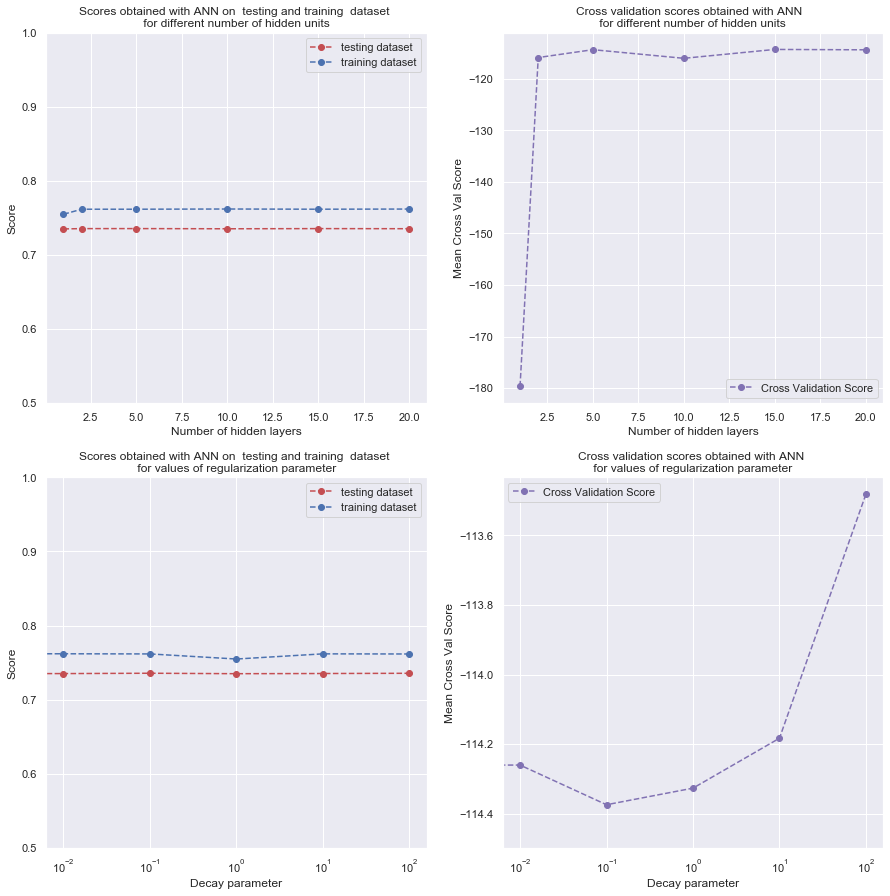

For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is 15
For the synthetic dataset, the best value of lambda in ANN is 100


In [15]:

## Estimate the scores for different number of hidden units
numhidden = [1, 2, 5, 10, 15, 20]
score_test = np.zeros(len(numhidden))
score_train = np.zeros(len(numhidden))
cross_val_scores = np.zeros(len(numhidden))

for h in np.arange(0,len(numhidden)):
    ann = MLPRegressor(hidden_layer_sizes=(numhidden[h],), activation='relu', solver='lbfgs', max_iter=2000)
    ann.fit(X_train_scaled,Y_train)
    score_test[h] = ann.score(X_test_scaled,Y_test)
    score_train[h] = ann.score(X_train_scaled,Y_train)
    cross_val_scores[h] = np.mean(cross_val_score(ann, X_scaled, Y,cv=5,scoring='neg_mean_squared_error'))
    
#plot performance
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(numhidden,score_test,'ro--',label='testing dataset') 
plt.plot(numhidden,score_train,'bo--',label='training dataset')
plt.xlabel("Number of hidden layers")
plt.ylabel("Score")
plt.ylim(0.5,1)
plt.title('Scores obtained with ANN on  testing and training  dataset \n for different number of hidden units ')
plt.legend()

plt.subplot(222)
plt.plot(numhidden,cross_val_scores, 'mo--',label ='Cross Validation Score') 
plt.legend()
plt.xlabel("Number of hidden layers")
plt.ylabel("Mean Cross Val Score")
plt.title('Cross validation scores obtained with ANN  \n for different number of hidden units ')

# Estiamte the value of h which gives highest score
besth = numhidden[np.argmax(cross_val_scores)]

decays=[0, 0.01, 0.1, 1, 10, 100]

score_test = np.zeros(len(decays))
score_train = np.zeros(len(decays))
cross_val_scores = np.zeros(len(decays))

for l in np.arange(0,len(decays)):
    ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = decays[l], solver='lbfgs', max_iter=2000)   
    ann.fit(X_train_scaled,Y_train)
    score_test[l] = ann.score(X_test_scaled,Y_test)
    score_train[l] = ann.score(X_train_scaled,Y_train)
    cross_val_scores[l] = np.mean(cross_val_score(ann, X_scaled, Y,cv=5,scoring='neg_mean_squared_error'))

# estimate the value of regularization parameter which gives highest score    
bestl = decays[np.argmax(cross_val_scores)]

#plot performance
plt.subplot(223)
plt.plot(decays,score_test,'ro--',label='testing dataset') 
plt.plot(decays,score_train,'bo--', label='training dataset')
plt.xlabel("Decay parameter")
plt.ylabel("Score")
plt.legend()
plt.ylim(0.5,1)
plt.xscale('log')
plt.title('Scores obtained with ANN on  testing and training  dataset \n for values of regularization parameter ')


plt.subplot(224)
plt.plot(decays,cross_val_scores, 'mo--',label ='Cross Validation Score') 
plt.legend()
plt.xlabel("Decay parameter")
plt.ylabel("Mean Cross Val Score")
plt.title('Cross validation scores obtained with ANN \n for values of regularization parameter ')
plt.xscale('log')
plt.show()

print('For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is {}'.format(besth))
print('For the synthetic dataset, the best value of lambda in ANN is {}'.format(bestl))


***Once we get the optimal values of hidden units and regularization parameter, compare the predictions as well as estimate the learning curves. We can now conclude that good scores (around 75 %) are obtained for large number of sample (around 15000) with ANN. Also note that when the number of samples is small (around 5000), there is a huge variation in the scores with the training size. This was also observed in the synthetic data having very small number (1000) of samples.  The predicted values of PM10 concentration also compare well with that of the actual values.  ***

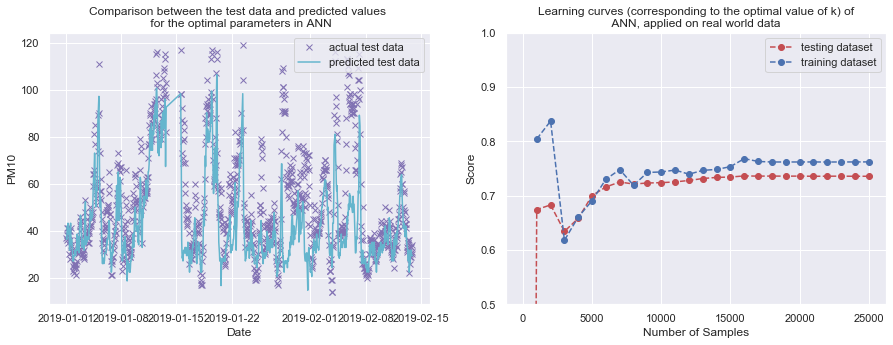

In [17]:
ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = bestl, solver='lbfgs', max_iter=2000)
ann.fit(X_train_scaled,Y_train)

p_train= ann.predict(X_train_scaled)
p_test= ann.predict(X_test_scaled)

#For visibility, plot the first 4500 points of the test data#
n1 = 1
n2 =1000

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(test_df.index[n1:n2], Y_test[n1:n2], 'mx', label='actual test data')
plt.plot(test_df.index[n1:n2], p_test[n1:n2], 'c',label='predicted test data')
plt.legend()
plt.xlabel("Date")
plt.ylabel("PM10")
plt.title('Comparison between the test data and predicted values \n for the optimal parameters in ANN')



interval_learning_curve = 1000

num_samples = np.arange(1,len(Y_train) + len(Y_test), interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(num_samples))
test_score = np.zeros(len(num_samples))


for idx,samples in enumerate(num_samples):
    ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='relu', alpha = bestl, solver='lbfgs', max_iter=2000)
    ann.fit(X_train_scaled[0:samples,:],Y_train[0:samples])
    train_score[idx] = ann.score(X_train_scaled[0:samples,:],Y_train[0:samples])
    test_score[idx] = ann.score(X_test_scaled,Y_test)
    
#plot learning curves
plt.subplot(122)
plt.plot(num_samples,test_score,'ro--',label='testing dataset')
plt.plot(num_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel("Number of Samples")
plt.ylabel("Score")
plt.ylim((0.5,1))
plt.title('Learning curves (corresponding to the optimal value of k) of\n ANN, applied on real world data ')
plt.show()

### 1.2.3 Comparison Between Artifical Neural Networks and K Nearest Neighbour
The cross validation scores and their difference for the two models are then calculated. The mean and the standard deviation of the difference is  estimated to compare the two models. The data indicate that the scores obtained from both methods are identical. 


In [20]:
ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
ann.fit(X_train_scaled,Y_train)
cross_val_scores_ann = cross_val_score(ann, X_scaled, Y,cv=5,scoring='neg_mean_squared_error')

knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
knn.fit(X_train_scaled,Y_train)
cross_val_scores_knn = cross_val_score(knn,X_scaled, Y,cv=5,scoring='neg_mean_squared_error')

print("cross validation scores:")

print("mean error Artificial Neural Netwrok" + repr(np.mean(cross_val_scores_ann)))
print("mean error K Nearest Neighbor:" + repr(np.mean(cross_val_scores_knn)))


diff_cross_val_score = cross_val_scores_knn - cross_val_scores_ann

delta_mean = np.mean(diff_cross_val_score)
print("mean error difference:" +repr(delta_mean))

num_folds = 5
sdelta =np.sqrt(1./(num_folds*(num_folds-1))*np.sum(((diff_cross_val_score)-delta_mean)**2))
    
print("error stdev estimate:" +repr(sdelta))
print("CI interval: [" +repr(delta_mean- 2.23* sdelta) 
      +","+repr(delta_mean+ 2.23* sdelta) +"]")

cross validation scores:
mean error Artificial Neural Netwrok-114.16091218082047
mean error K Nearest Neighbor:-114.57284622712898
mean error difference:-0.41193404630849384
error stdev estimate:1.26256991066877
CI interval: [-3.227464947099851,2.403596854482863]


### 1.2.4: Combining Artificial Neural Networks with K Nearest Neighbour 
As an extension, the predicted PM10 concentration curves obtained from KNN and ANN are averaged, to form a new combined model that is a tradeoff between the two methods. The predictions of PM10 from ANN, KNN and the combined model, along with the values of PM10 is plotted for the test data.



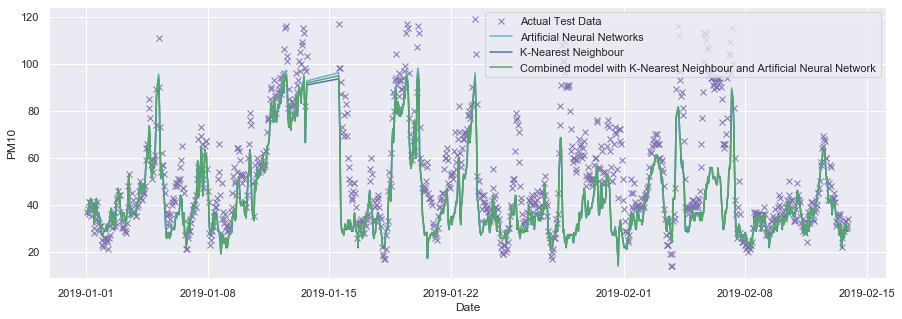

In [21]:
knn = neighbors.KNeighborsRegressor(n_neighbors=bestK)
ann = MLPRegressor(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)

ann.fit(X_train_scaled,Y_train)
p_test_ann = ann.predict(X_test_scaled)

knn.fit(X_train_scaled,Y_train)
p_test_knn = knn.predict(X_test_scaled)

p_combined = (np.squeeze(p_test_ann) + np.squeeze(p_test_knn))/2

#For visibility, plot the first 1000 points of the test data#
n1 = 1
n2 = 1000

plt.figure(figsize=(15,5))
plt.plot(test_df.index[n1:n2], Y_test[n1:n2], 'mx', label='Actual Test Data')
plt.plot(test_df.index[n1:n2], p_test_ann[n1:n2], 'c',label='Artificial Neural Networks')
plt.plot(test_df.index[n1:n2], p_test_knn[n1:n2], 'b',label='K-Nearest Neighbour')
plt.plot(test_df.index[n1:n2], p_combined[n1:n2], 'g',label='Combined model with K-Nearest Neighbour and Artificial Neural Network')
plt.legend()
plt.xlabel("Date")
plt.ylabel("PM10")
plt.show()

# 2 : Classification

In this section, we use the same algorithms (k-Nearest Neighbour and Artificial Neural Networks) for classification and compare their performance. Subsections (2.1) and (2.2) correspond to prediction using the algorithms for synthetic and real-world data respectively.


### 2.1 Classification with Synthetic Dataset
To generate the synthetic data, I use the function make_classification from sklearn. The function generates a random n-class classification problem, where the number of features is 20 and number of classes is 2 by default. A random_state also has to be provided which determines a random number to create the dataset.  So, with the default parameters, we get 20 input features and a binary output which can be a zero or 1. 

The data is now split into a training dataset and testing dataset, and the input features are scaled. For clarity, I also plot a sub-sample of the outputs for the test data. As there are 20 features, it is not possible to plot them on the x-axis. Hence, the x-axis in the plot correspond to the entries (indices) of the data, rather than the features.  


Text(0.5, 1.0, 'Binary Output Corresponding to the test data')

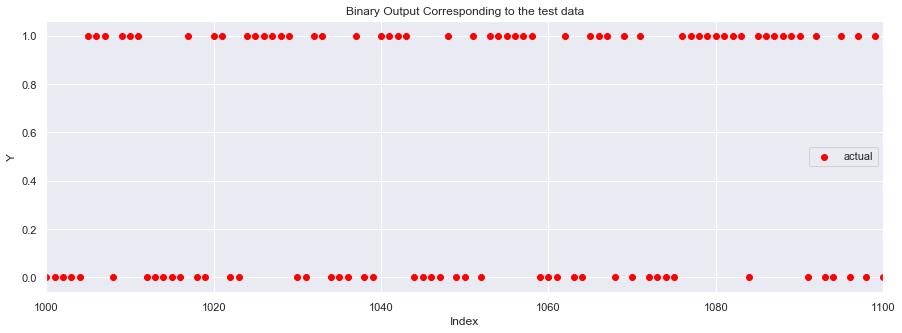

In [82]:
num_samples = 10000

X, y = make_classification(num_samples,random_state = 3)
y = y.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 
X_scaled = scaler.transform(X) 

plt.figure(figsize=(15,5))
plt.scatter(index,y_test,color = 'red',label = 'actual')
plt.xlim(1000,1100)
plt.xlabel('Index')
plt.ylabel('Y')
plt.legend()
plt.title('Binary Output Corresponding to the test data')


### 2.1.1 Classification with KNN on Synthetic Dataset 

We now train the k-nearest neighbours (KNN) algorithm on the synthetic data set for different values of k. This is to obtain the optimal value of k for this dataset. 

The scores obtained for the training and testing dataset, along with the cross validation score is estimated and plotted. The value of k (=150) which gives the best cross validation score is then selected. Note that k cannot be be too small (leading to overfitting) not too large (leading to large bias). The accuracy of this predicted data is around 91% for the testing and training dataset. The predicted data is then compared to the actual test data (only a small section for clarity) in a plot. In this plot, note that when the actual and predicted data overlap (at either zero or one) at the same index, the prediction is correct. This is seen in most of the cases. Else, the prediction is wrong.  

Furthermore, the learning curves are plotted to understand the accuracies of prediction as well as the number of training examples needed for prediction. Typical accuracies of prediction is over 90% when a large number of samples (~200) are used for training. 


For the synthetic dataset, the best value of K in KNN is 150


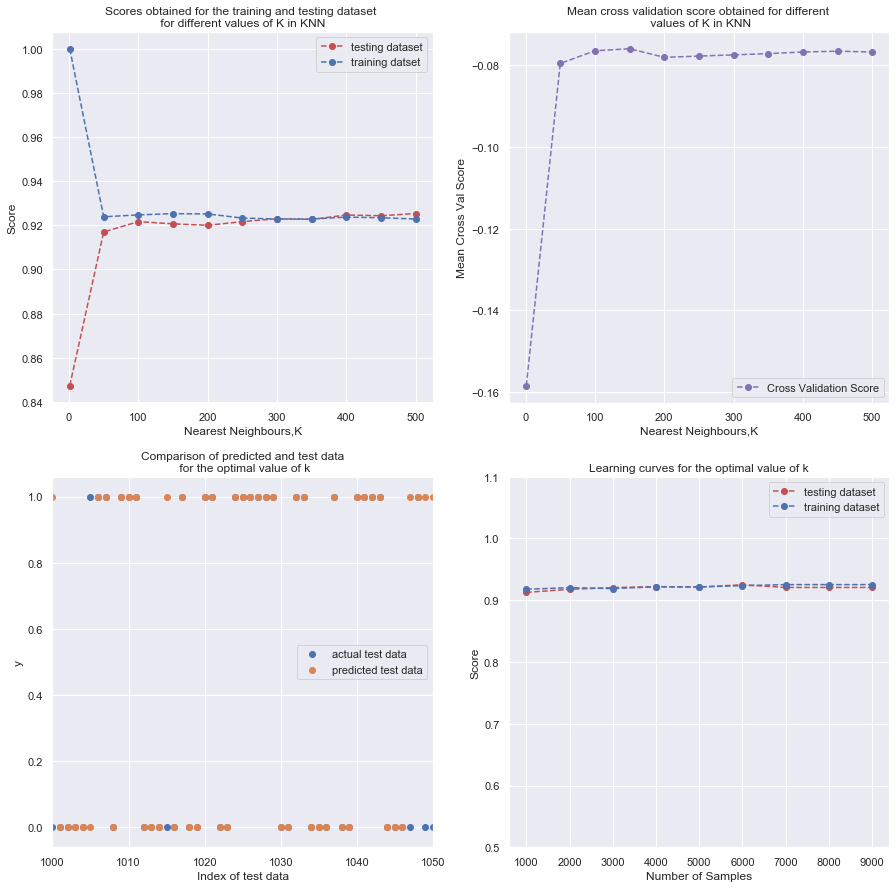

In [85]:
kf = 5

Ks=[1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]


# Estimate score for different values of k

score_test = np.zeros(len(Ks))
score_train = np.zeros(len(Ks))
cross_val_scores = np.zeros(len(Ks))

for k in np.arange(0,len(Ks)):
    knn = neighbors.KNeighborsClassifier(n_neighbors=Ks[k])
    knn.fit(X_train_scaled, y_train)
    score_test[k] = knn.score(X_test_scaled,y_test)
    score_train[k] = knn.score(X_train_scaled ,y_train)
    cross_val_scores[k]=np.mean(cross_val_score(knn,X_scaled, y,cv=kf,scoring='neg_mean_squared_error'))

plt.figure(figsize=(15,15))
plt.subplot(221)    
plt.plot(Ks, score_test, 'ro--', label = 'testing dataset' )
plt.plot(Ks, score_train, 'bo--', label = 'training datset' )
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Score")
plt.legend()
plt.title('Scores obtained for the training and testing dataset \n for different values of K in KNN ')

plt.subplot(222)
plt.plot(Ks,cross_val_scores, 'mo--',label='Cross Validation Score')
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Mean Cross Val Score")
plt.legend()
plt.title('Mean cross validation score obtained for different \n values of K in KNN')


bestK = Ks[np.argmax(cross_val_scores)]
print('For the synthetic dataset, the best value of K in KNN is {}'.format(bestK))


# Compare predicted and test data
knn = neighbors.KNeighborsClassifier(n_neighbors=bestK)
p_test = knn.fit(X_train_scaled,y_train).predict(X_test_scaled)

index = np.array(range(0, len(y_test)))

plt.subplot(223)
plt.scatter(index, y_test, label='actual test data')
plt.scatter(index, p_test,label='predicted test data')
plt.legend()
plt.xlim(1000,1050)
plt.xlabel("Index of test data")
plt.ylabel("y")
plt.title('Comparison of predicted and test data\n for the optimal value of k')


# Get training and testing curves
interval_learning_curve = 1000

learning_samples = np.arange(1000, len(y_train) + len(y_test), interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))


for idx,samples in enumerate(learning_samples):
    knn = neighbors.KNeighborsClassifier(n_neighbors=bestK)
    knn.fit(X_train_scaled[0:samples,:],y_train[0:samples])
    train_score[idx] = knn.score(X_train_scaled,y_train)
    test_score[idx] = knn.score(X_test_scaled,y_test)
    

#plot learning curves
plt.subplot(224)
plt.ylim(0.5,1.1)
plt.plot(learning_samples,test_score,'ro--',label='testing dataset')
plt.plot(learning_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves for the optimal value of k')
plt.show()



### 2.1.2 Classification with ANN on Synthetic Dataset

We now train the Artificial Neural Network (ANN) algorithm on the synthetic data set. We need to first estimate the optimal parameters for the ANN, i.e. the number of hidden units and the regularization parameter lambda. Note that the data has already been split into testing and training datasets, and scaled before.

Typical scores ( ~ 92 %) for the testing/training dataset is also high for ANN. Theoptimal values of hidden units is 5 and that of lambda = 1. This is identical to that of KNN. 

For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is 5
For the synthetic dataset, the best value of lambda in ANN is 1


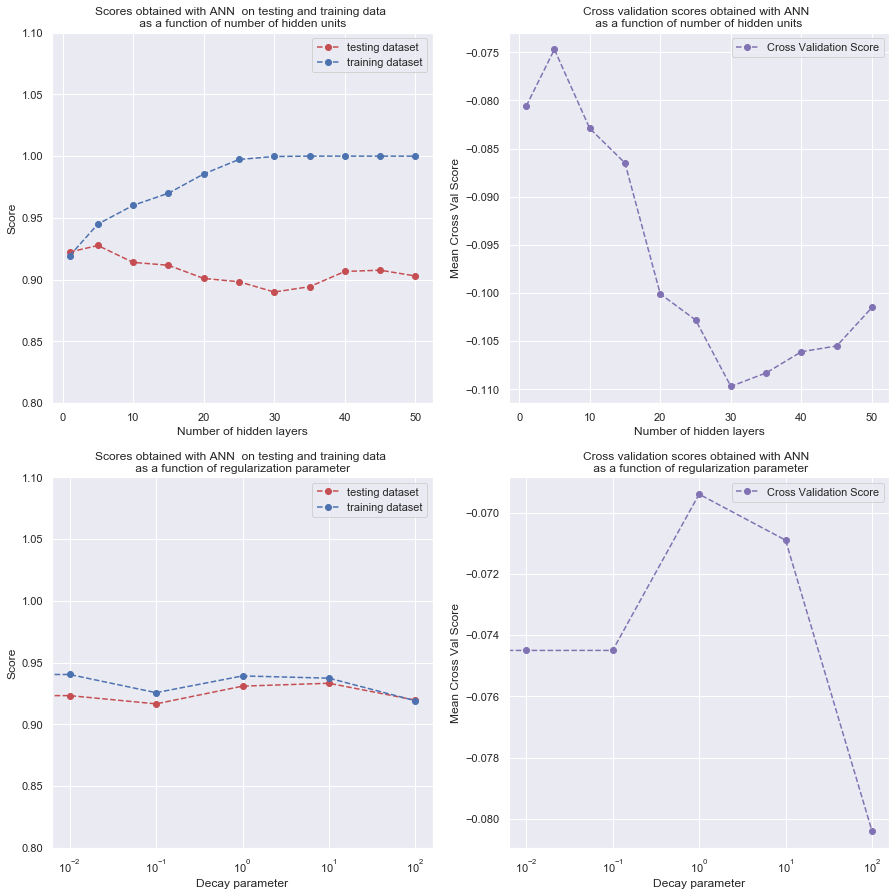

In [87]:
# Try to estimate the number of hidden units required. 
# Sweep the number of hidden units and estimate the scores (testing, training, cross validation)

numhidden = [1,5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

score_test = np.zeros(len(numhidden))
score_train = np.zeros(len(numhidden))
cross_val_scores = np.zeros(len(numhidden))

for h in np.arange(0,len(numhidden)):
    ann = MLPClassifier(hidden_layer_sizes=(numhidden[h],), activation='tanh', solver='lbfgs', max_iter=2000)
    ann.fit(X_train_scaled,y_train)
    score_test[h] = ann.score(X_test_scaled,y_test)
    score_train[h] = ann.score(X_train_scaled,y_train)
    cross_val_scores[h] = np.mean(cross_val_score(ann, X_scaled, y,cv=5,scoring='neg_mean_squared_error'))
    
#plot performance
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(numhidden,score_test,'ro--',label='testing dataset') 
plt.plot(numhidden,score_train,'bo--',label='training dataset')
plt.xlabel("Number of hidden layers")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.title('Scores obtained with ANN  on testing and training data \n as a function of number of hidden units ')
plt.legend()

plt.subplot(222)
plt.plot(numhidden,cross_val_scores, 'mo--',label='Cross Validation Score') 
plt.legend()
plt.xlabel("Number of hidden layers")
plt.ylabel("Mean Cross Val Score")
plt.title('Cross validation scores obtained with ANN  \n as a function of number of hidden units ')

besth = numhidden[np.argmax(cross_val_scores)]

# For the best value of h, Try to estimate the number of regularization parameter lambda (alpha) required. 
# Sweep the value of alpha  and estimate the scores (testing, training, cross validation)

decays=[0, 0.01, 0.1, 1, 10, 100]

score_test = np.zeros(len(decays))
score_train = np.zeros(len(decays))
cross_val_scores = np.zeros(len(decays))

for l in np.arange(0,len(decays)):
    ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = decays[l], solver='lbfgs', max_iter=2000)   
    ann.fit(X_train_scaled,y_train)
    score_test[l] = ann.score(X_test_scaled,y_test)
    score_train[l] = ann.score(X_train_scaled,y_train)
    cross_val_scores[l] = np.mean(cross_val_score(ann, X_scaled, y,cv=5,scoring='neg_mean_squared_error'))

    
bestl = decays[np.argmax(cross_val_scores)]

#plot performance
plt.subplot(223)
plt.plot(decays,score_test,'ro--',label='testing dataset') 
plt.plot(decays,score_train,'bo--', label='training dataset')
plt.xlabel("Decay parameter")
plt.ylabel("Score")
plt.ylim(0.8, 1.1)
plt.title('Scores obtained with ANN  on testing and training data \n as a function of regularization parameter ')
plt.legend()
plt.xscale('log')

plt.subplot(224)
plt.plot(decays,cross_val_scores, 'mo--',label='Cross Validation Score') 
plt.legend()
plt.xlabel("Decay parameter")
plt.ylabel("Mean Cross Val Score")
plt.title('Cross validation scores obtained with ANN  \n as a function of regularization parameter')
plt.xscale('log')

print('For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is {}'.format(besth))
print('For the synthetic dataset, the best value of lambda in ANN is {}'.format(bestl))

**Once the best value of the number of hidden units and that of lambda are obtained, I will now plot the predicted and test data, along with the learning curves. I note from the plots that for this data, the predictions  match the test data well. 
However, from the learning curves, I note that training with ANN requires more samples to train compared to that of KNN.**

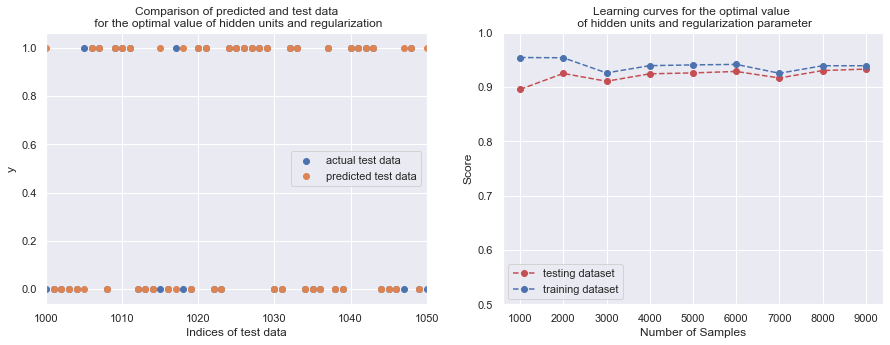

In [88]:
## Plot the comparison between the predicted and testing data

ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
ann.fit(X_train_scaled,y_train)
p_test= ann.predict(X_test_scaled)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(index, y_test, label='actual test data')
plt.scatter(index, p_test,label='predicted test data')
plt.title('Comparison of predicted and test data\n for the optimal value of hidden units and regularization')
plt.legend()
plt.xlim(1000,1050)
plt.xlabel("Indices of test data")
plt.ylabel("y")

## Get the learning curve to see the number of samples required for training

interval_learning_curve = 1000
learning_samples = np.arange(1000, len(y_train) + len(y_test), interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))


for idx,samples in enumerate(learning_samples):
    ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
    ann.fit(X_train_scaled[0:samples,:],y_train[0:samples])
    train_score[idx] = ann.score(X_train_scaled[0:samples,:],y_train[0:samples])
    test_score[idx] = ann.score(X_test_scaled,y_test)
    

#plot learning curves
plt.subplot(122)
plt.ylim(0.5,1)
plt.plot(learning_samples,test_score,'ro--',label='testing dataset')
plt.plot(learning_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves for the optimal value \n of hidden units and regularization parameter')
plt.show()

### 2.2 RealWord Dataset

From the synthetic datset, we have now understood that KNN and ANN performs well on the the dataset for classification. We will now move on to a real world dataset which is larger (~25000 points). This dataset corresponds to the credit card transactions by european cardholders from https://www.kaggle.com/mlg-ulb/creditcardfraud.

The datasets have 30 features (including time and amount) and one output (Class) labeling whether the transaction is fraudulent or genuine. The format of the data is shown for clarity. 



In [99]:
col_list = ["Time", "V1", "V2", "V3", "V4", "V5","V6","V7","V8","V9","V10","V11",
           "V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23",
           "V24","V25","V26","V27","V28","Amount","Class"]       
          
df = pd.read_csv("creditcard.csv", usecols = col_list)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


***I note that the data is imbalanced and heavily skewed with majority (99.83%) of the transactions being genuine and only 0.17% being fraudulent*** 

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


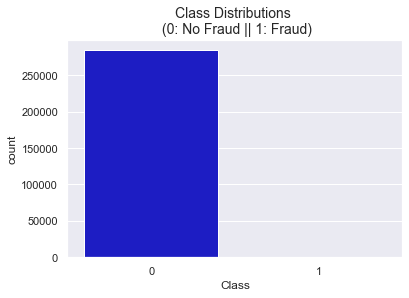

In [100]:
# The classes are heavily skewed we need to solve this issue.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

amount_val = df['Amount'].values
time_val = df['Time'].values

The input features  are scaled. I note from the dataset that most of the data (V1...V28) has already been scaled. Hence,  I we will scale the the remaining part (Time and amount).

In [101]:

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)


df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


***As the data is highly skewed, we need to to make sure that the percentage of genuine/fraudulent data is equally distributed prior to training. Else, we would not be able to train accurately***

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


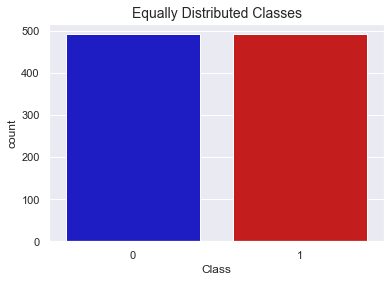

In [103]:
# our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()



***For understanding the data, I also plot the correlation matrix to note whether many of the features are correlated. However, I still will train assuming the full feature set.  ***

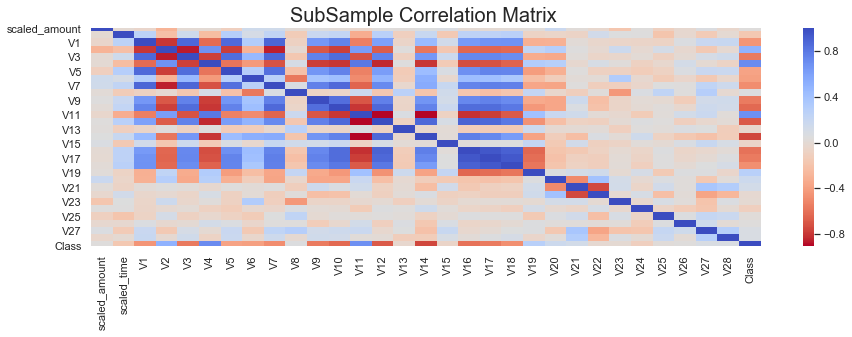

<Figure size 1080x360 with 0 Axes>

In [104]:
# Subsample is used in the correlation matrix

f, (ax2) = plt.subplots( 1, figsize=(15,4))

# Entire DataFrame
corr = df.corr()
plt.figure(figsize=(15,5))
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':25}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix ', fontsize=20)
plt.show()

***I now split the equally distriibuted data into the test/training datasets for training. The data is also plotted, and shows an equal distribution of fraudulent and genuine data.***  

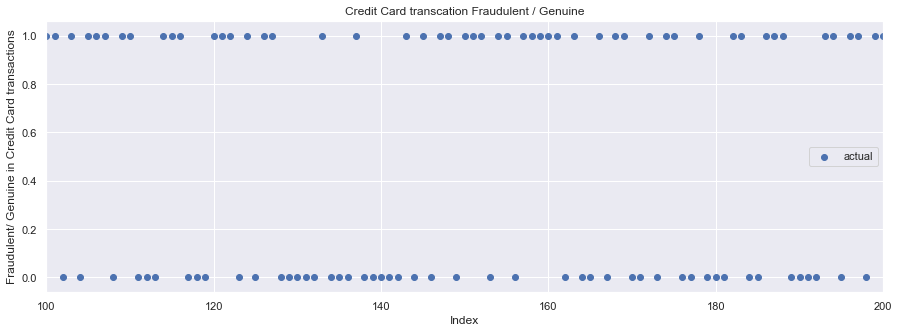

In [106]:
X1 = new_df.loc[:, new_df.columns != 'Class'].values
y1 = new_df.loc[:, new_df.columns == 'Class'].values  


X_train1, X_test1, Y_train1, Y_test1 = train_test_split(
    X1, y1, test_size=0.4, random_state=42)


index = np.array(range(0, len(Y_test1)))

plt.figure(figsize=(15,5))
plt.scatter(index, Y_test1, label='actual')
plt.xlabel('Index')
plt.ylabel('Fraudulent/ Genuine in Credit Card transactions')
plt.legend()
plt.title('Credit Card transcation Fraudulent / Genuine')
plt.xlim(100,200)
plt.show()


### 2.2.1 Prediction with KNN on Realword dataset
I now want to predict the credit transcation is fraudulet or genuine in the real world dataset using KNN. As performed with the synthetic dataset, I need to estimate the optimal value of k from the cross validation/training/testing dataset scores. Like before, the best value of k (== 1) is obtained, the actual test data and the predicted test data are then compared in a plot, and finally the learning curves are plotted. The predictions do match the test data reasonably well. I note that the typical scores obtained for the training/testing datasets here is ~ 91% and is identical to that obtained in the synthetic data (~ 91%). 

For the realworld dataset, the best value of K in KNN is 1


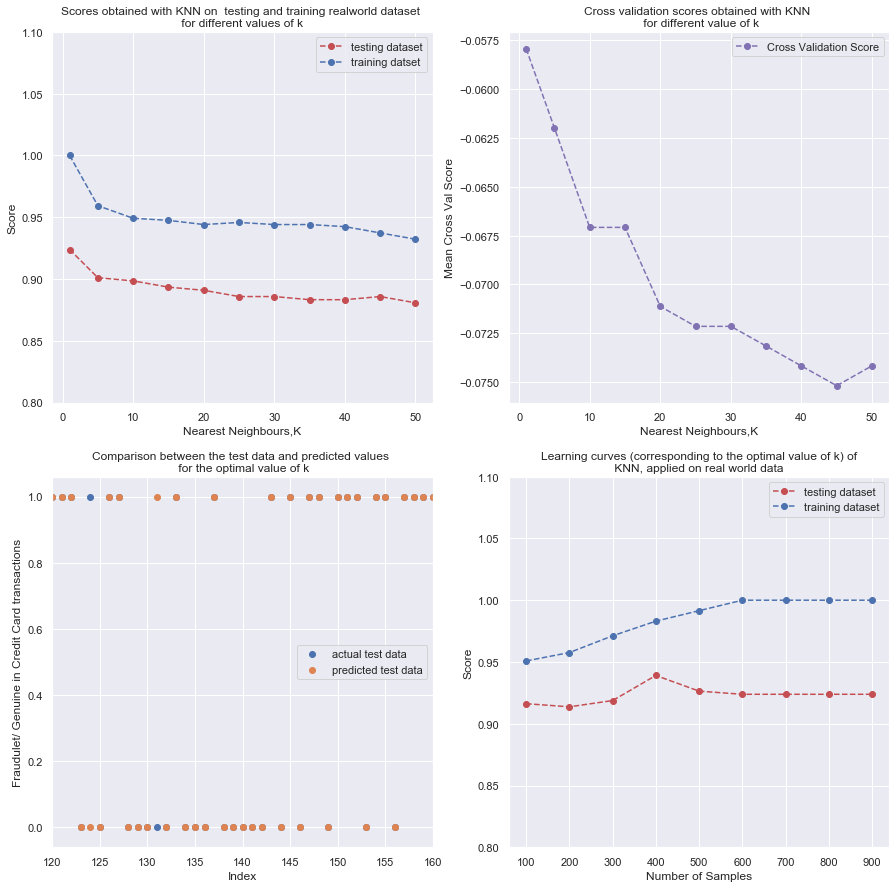

In [113]:
kf = 5
Ks = [1,5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


score_test = np.zeros(len(Ks))
score_train = np.zeros(len(Ks))
cross_val_scores = np.zeros(len(Ks))

for k in np.arange(0,len(Ks)):
    knn = neighbors.KNeighborsClassifier(n_neighbors=Ks[k])
    knn.fit(X_train1, Y_train1)
    score_test[k] = knn.score(X_test1,Y_test1)
    score_train[k] = knn.score(X_train1 ,Y_train1)
    cross_val_scores[k]=np.mean(cross_val_score(knn,X1, y1,cv=kf,scoring='neg_mean_squared_error'))

plt.figure(figsize=(15,15))
plt.subplot(221)
plt.ylim(0.8,1.1)
plt.plot(Ks, score_test, 'ro--', label = 'testing dataset' )
plt.plot(Ks, score_train, 'bo--', label = 'training datset' )
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Score")
plt.title('Scores obtained with KNN on  testing and training realworld dataset \n for different values of k ')
plt.legend()
   
plt.subplot(222)
plt.plot(Ks,cross_val_scores, 'mo--',label = 'Cross Validation Score')
plt.xlabel("Nearest Neighbours,K")
plt.ylabel("Mean Cross Val Score")
plt.legend()
plt.title('Cross validation scores obtained with KNN \n for different value of k')


## estimate best value of k
bestK = Ks[np.argmax(cross_val_scores)]
print('For the realworld dataset, the best value of K in KNN is {}'.format(bestK))

## compared predicted data with test data and plot
knn = neighbors.KNeighborsClassifier(n_neighbors=bestK)
p_test = knn.fit(X_train1,Y_train1).predict(X_test1)


plt.subplot(223)
plt.scatter(index, Y_test1, label='actual test data')
plt.scatter(index, p_test,label='predicted test data')
plt.xlim(120,160)
plt.legend()
plt.xlabel("Index")
plt.ylabel("Fraudulet/ Genuine in Credit Card transactions")
plt.title('Comparison between the test data and predicted values \n for the optimal value of k')

## Estimate the learning curves 
interval_learning_curve = 100
learning_samples = np.arange(100, len(Y_train1) + len(Y_test1), interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))


for idx,samples in enumerate(learning_samples):
    knn = neighbors.KNeighborsClassifier(n_neighbors=bestK)
    knn.fit(X_train1[0:samples,:],Y_train1[0:samples])
    train_score[idx] = knn.score(X_train1,Y_train1)
    test_score[idx] = knn.score(X_test1,Y_test1)
    

#plot learning curves
plt.subplot(224)
plt.ylim(0.8,1.1)
plt.plot(learning_samples,test_score,'ro--',label='testing dataset')
plt.plot(learning_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves (corresponding to the optimal value of k) of\n KNN, applied on real world data ')
plt.show()



### 2.2.2 Classification with ANN on Realword dataset

We will now perform classification using ANN using the realworld dataset. As before, we need to estimate the optimal value of the number of hidden units (2) an regularization prameter (10) first from the scores. Typical scores ~ 92 % are obtained for the training and testing datasets. However, I note that the exact value of hidden units and lambda can vary between runs due to the limited data available. Still a good accuracy is obtained. 

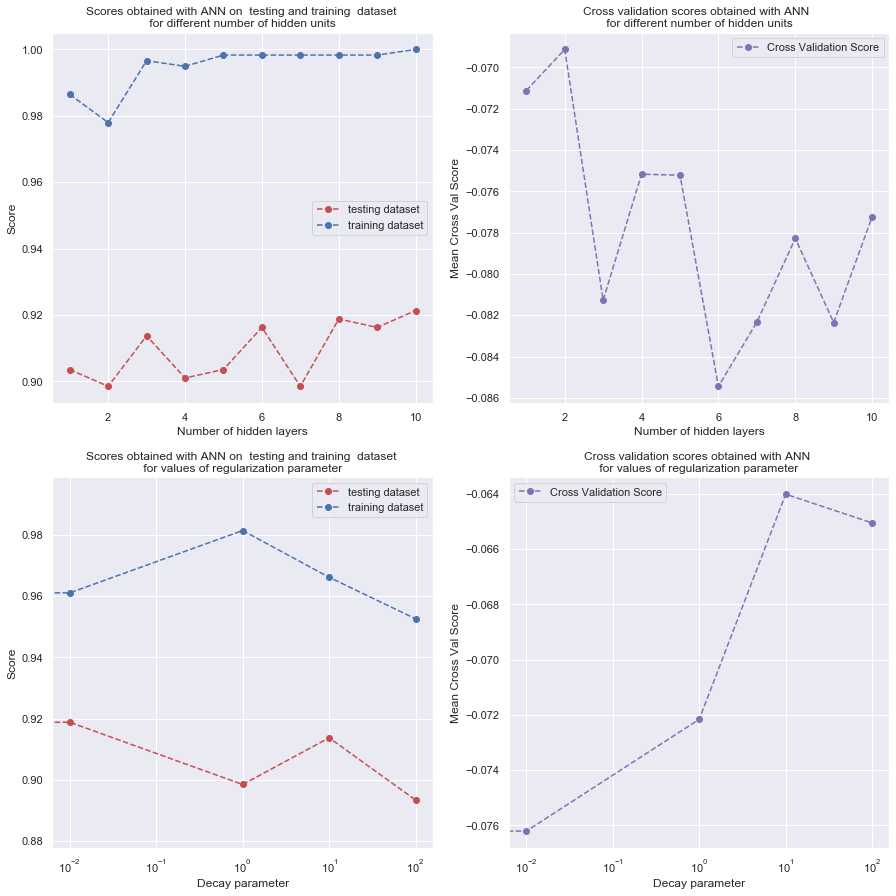

For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is 2
For the synthetic dataset, the best value of lambda in ANN is 10


In [137]:
## Estimate the scores for different number of hidden units
numhidden = [1,2 ,3 ,4, 5, 6, 7, 8, 9, 10]

score_test = np.zeros(len(numhidden))
score_train = np.zeros(len(numhidden))
cross_val_scores = np.zeros(len(numhidden))

for h in np.arange(0,len(numhidden)):
    ann = MLPClassifier(hidden_layer_sizes=(numhidden[h],), activation='tanh', solver='lbfgs', max_iter=2000)
    ann.fit(X_train1,Y_train1)
    score_test[h] = ann.score(X_test1,Y_test1)
    score_train[h] = ann.score(X_train1,Y_train1)
    cross_val_scores[h] = np.mean(cross_val_score(ann, X1, y1,cv=5,scoring='neg_mean_squared_error'))
    
#plot performance
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.plot(numhidden,score_test,'ro--',label='testing dataset') 
plt.plot(numhidden,score_train,'bo--',label='training dataset')
plt.xlabel("Number of hidden layers")
plt.ylabel("Score")
plt.title('Scores obtained with ANN on  testing and training  dataset \n for different number of hidden units ')
plt.legend()

plt.subplot(222)
plt.plot(numhidden,cross_val_scores, 'mo--',label = 'Cross Validation Score') 
plt.legend()
plt.xlabel("Number of hidden layers")
plt.ylabel("Mean Cross Val Score")
plt.title('Cross validation scores obtained with ANN  \n for different number of hidden units ')

# Estiamte the value of h which gives highest score
besth = numhidden[np.argmax(cross_val_scores)]


decays=[0, 0.01, 1, 10, 100]

score_test = np.zeros(len(decays))
score_train = np.zeros(len(decays))
cross_val_scores = np.zeros(len(decays))

for l in np.arange(0,len(decays)):
    ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = decays[l], solver='lbfgs', max_iter=2000)   
    ann.fit(X_train1,Y_train1)
    score_test[l] = ann.score(X_test1,Y_test1)
    score_train[l] = ann.score(X_train1,Y_train1)
    cross_val_scores[l] = np.mean(cross_val_score(ann, X1, y1,cv=5,scoring='neg_mean_squared_error'))

# estimate the value of regularization parameter which gives highest score        
bestl = decays[np.argmax(cross_val_scores)]

#plot performance
plt.subplot(223)
plt.plot(decays,score_test,'ro--',label='testing dataset') 
plt.plot(decays,score_train,'bo--', label='training dataset')
plt.xlabel("Decay parameter")
plt.ylabel("Score")
plt.legend()
plt.xscale('log')
plt.title('Scores obtained with ANN on  testing and training  dataset \n for values of regularization parameter ')
 

plt.subplot(224)
plt.plot(decays,cross_val_scores, 'mo--',label='Cross Validation Score') 
plt.legend()
plt.xlabel("Decay parameter")
plt.ylabel("Mean Cross Val Score")
plt.xscale('log')
plt.title('Cross validation scores obtained with ANN \n for values of regularization parameter ')
plt.show()

print('For the synthetic dataset, the best value of the number of hidden units in a single layer ANN is {}'.format(besth))
print('For the synthetic dataset, the best value of lambda in ANN is {}'.format(bestl))


*Once we get the optimal values of hidden units and regularization parameter, compare the predictions as well as estimate the learning curves. We can now conclude that good scores (over 90 %) are obtained even for the small dataset.**  

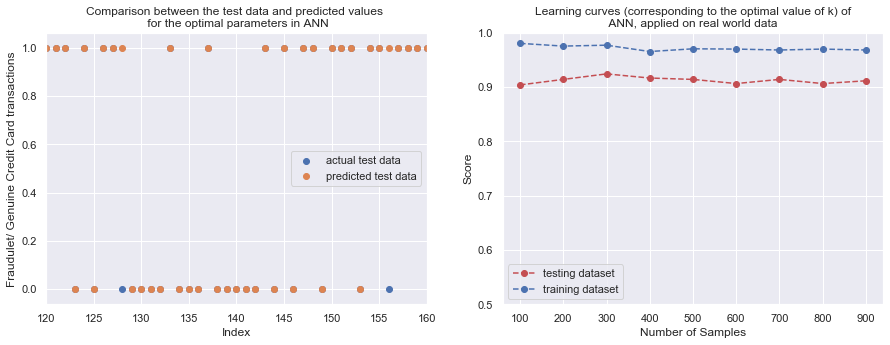

In [139]:
ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
ann.fit(X_train1,Y_train1)

p_train= ann.predict(X_train1)
p_test= ann.predict(X_test1)

index = np.array(range(0, len(Y_test1)))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(index, Y_test1, label='actual test data')
plt.scatter(index, p_test,label='predicted test data')
plt.legend()
plt.xlim(120,160)
plt.xlabel("Index")
plt.ylabel("Fraudulet/ Genuine Credit Card transactions")
plt.title('Comparison between the test data and predicted values \n for the optimal parameters in ANN')


interval_learning_curve = 100

learning_samples = np.arange(100, len(Y_train1) + len(Y_test1), interval_learning_curve)

#results on training/validation set
train_score = np.zeros(len(learning_samples))
test_score = np.zeros(len(learning_samples))


for idx,samples in enumerate(learning_samples):
    ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
    ann.fit(X_train1[0:samples,:],Y_train1[0:samples])
    train_score[idx] = ann.score(X_train1[0:samples,:],Y_train1[0:samples])
    test_score[idx] = ann.score(X_test1,Y_test1)
    

#plot learning curves
plt.subplot(122)
plt.ylim(0.5,1)
plt.plot(learning_samples,test_score,'ro--',label='testing dataset')
plt.plot(learning_samples,train_score, 'bo--', label='training dataset')
plt.legend()
plt.xlabel('Number of Samples')
plt.ylabel('Score')
plt.title('Learning curves (corresponding to the optimal value of k) of\n ANN, applied on real world data ')
plt.show()

### 2.2.3 Comparison between KNN and ANN on real-world dataset. 

I now compare the cross validation scores of both the methods on the real world datasets, and see that  the performance is identical.

In [141]:
ann = MLPClassifier(hidden_layer_sizes=(besth,), activation='tanh', alpha = bestl, solver='lbfgs', max_iter=2000)
ann.fit(X_train1,Y_train1)
cross_val_scores_ann = cross_val_score(ann, X1, y1,cv=5,scoring='neg_mean_squared_error')

knn = neighbors.KNeighborsClassifier(n_neighbors=bestK)
knn.fit(X_train1,Y_train1)
cross_val_scores_knn = cross_val_score(knn,X1, y1,cv=5,scoring='neg_mean_squared_error')

print("cross validation scores:")

print("mean error Artificial Neural Netwrok" + repr(np.mean(cross_val_scores_ann)))
print("mean error K Nearest Neighbor:" + repr(np.mean(cross_val_scores_knn)))


diff_cross_val_score = cross_val_scores_knn - cross_val_scores_ann

delta_mean = np.mean(diff_cross_val_score)
print("mean error difference:" +repr(delta_mean))

num_folds = 5
sdelta =np.sqrt(1./(num_folds*(num_folds-1))*np.sum(((diff_cross_val_score)-delta_mean)**2))
    
print("error stdev estimate:" +repr(sdelta))
print("CI interval: [" +repr(delta_mean- 2.23* sdelta) 
      +","+repr(delta_mean+ 2.23* sdelta) +"]")

cross validation scores:
mean error Artificial Neural Netwrok-0.06503813646670789
mean error K Nearest Neighbor:-0.05792620078334364
mean error difference:0.007111935683364254
error stdev estimate:0.00259757642254232
CI interval: [0.0013193402610948805,0.012904531105633627]


# Conclusion

In short, I have compared the performance of ANN and KNN for classification and regression problems. The parameters used for these algorithms have been optimized for the datasets, and the performance have been tested on synthetic and real world datasets. From the results, I answer the following research questions :


#### 1. Is ANN or KNN better suited for regression problemsn when the dataset is small ?
Ans. ANN does not perform well on regression problems when the given dataset is small (~ 1000). For such problems KNN works much better. e.g. for synthetic generated data, the predicted scores obtained in KNN was over 90%, whereas ANN scores was only 80% and did not capture many components in the output.   

#### 2. How does ANN And KNN compare for larger datasets and real world problems ? 
Ans. For regression problems with larger datasets (~ 25000), the performance of KNN and ANN are identical and gave accuracies around 75 %. This tells when real world problems can give scores compared to the ideal scenarios assumed in synthetic data. 

#### 3. How does the size of the dataset affect the performance of KNN or ANN for classification problem, and what accuracies can be expected ?
Ans. For classification problems, both ANN And KNN were capable of predicting the output to within 92%. This is regardless of the size of the dataset (e.g. 10000 for synthetic and ~ 900 for real world).


#### 4. If the datasets are skewed, how is it possible to deal with them and what accuracies are expected from ANN/KNN ?
Answer : Skewed datasets (e.g. the one I considered for the real world classification dataset problem) has to be tackled differently. Such datasets have to be sampled appropriately for the outputs to be equally distribuited, and good prediction accuracies (92%) can be achieved. 


